# Newton and Quasi-Newton Methods

## Exercise 1: Newton's Method

In [224]:
import numpy as np



def Newton(Df, Hf, x0, maxiter=500, tol=1e-):
    iter = 0
    epsi = 1 
    D = Df(x0)
    H = Hf(x0)
    converged = False
    while (epsi > tol) & (iter < maxiter):
        iter +=1
        
        z = np.linalg.solve(H, D.T)

        x = x0 - z

        x0 = x
        D = Df(x0)
        H = Hf(x0)
        
        epsi = np.linalg.norm(D, np.inf)

    
    if  epsi< tol:
#         print("Converged!")
        converged = True
    
    return x, converged, iter



In [209]:
from scipy import optimize as opt
f = opt.rosen # The Rosenbrock function.
df = opt.rosen_der # The first derivative.
d2f = opt.rosen_hess # The second derivative (Hessian).
output = opt.fmin_bfgs(f=f, x0=[-2,2], fprime=df, maxiter=50, retall=True)



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42
[array([-2,  2]), array([-1.01994107,  2.24409936]), array([-0.562813  ,  0.73585826]), array([-0.36827151,  0.18693516]), array([-0.32503271,  0.07231728]), array([-0.33815082,  0.10876181]), array([-0.33155626,  0.10065382]), array([-0.32008543,  0.0897776 ]), array([-0.29877807,  0.07223382]), array([-0.25810869,  0.04233263]), array([-0.18144513, -0.00617483]), array([-0.14828669, -0.01469884]), array([-0.10811225, -0.0128942 ]), array([ 0.01400379, -0.02662741]), array([0.12683461, 0.00832816]), array([0.18664968, 0.01372847]), array([0.25626686, 0.04271876]), array([0.34183051, 0.10297075]), array([0.45408563, 0.18528138]), array([0.54024058, 0.29449385]), array([0.59937917, 0.35059563]), array([0.64518344, 0.40214864]), array([0.69724825, 0.47211744]), array([0.7542323 , 0.56407697]), array([0.84367453, 0.6962

In [22]:
Newton(df, d2f, [-2,2])

Converged!


(array([1., 1.]), True, 6)

## Exercise 2: BFGS

In [221]:
import numpy as np



def BFGS(Df, x0, maxiter=1000, tol=1e-8):
    iter = 0
    epsi = 1 
    D = Df(x0)
    A0 = np.eye(len(x0),len(x0))
    converged = False
    while (epsi > tol) & (iter < maxiter):
        iter +=1

        x = x0 - A0 @ D.T

        
        s = x - x0

        y = Df(x).T - D.T

#         if s

        STY = s.T @ y
        if STY == 0:
            print("Dividing by zero!")
            break
        
        bloc1 = (STY + y.T @ A0 @ y) * np.outer(s,s.T) / ( STY )**2
        bloc2 = (A0 @  np.outer(y,s.T) + np.outer(s,y.T) @ A0)/ ( STY )
        A = A0 + bloc1 - bloc2
        A0 = A


        x0 = x
        D = Df(x0)

        
        epsi = np.linalg.norm(D, np.inf)
#         print(epsi)
    
    if  epsi< tol:
#         print("Converged!")
        converged = True
    
    return x, converged, iter



In [207]:
BFGS(df,[-2,2])

1650460825606.0
316719.64597053104
1086827036.7061486
8449.963316947576
206.04962107212023
5.983813919112525
5.983204887348917
5.801183801472974
5.618548720790901
5.2538782980511884
4.706564773928992
3.794654650060277
2.3359897529025235
1.5096675673555104
3.8468638160603206
9.993050809585192
19.875835586494787
34.99885926869326
169.5527559130816
51.62895820579609
72.52764188719466
2.449302279163792
22.001471142135593
29.691864616730232
149.9532851799965
2.153111117106299
36.81350243722473
29.033500627655954
11.85789842196052
66.84160527092483
2.2710061541216864
6.652337321581809
376.4789811433079
4.189856921118594
2.9026285858201524
3.051598616790141
25691.869488219498
1.632133584144535
2.481240506590164
6.622716470071074
7.344791412357562
12.10730751667693
16.33206076709515
20.578540132271947
20.610020024386092
14.926259083581098
5.990955443010169
32.67579203083692
1.736379907165475
2.1340861200326744
323169.81828903337
2.3523886808857273
2.497017452989768
3.058050592235729
3.17500997

(array([1., 1.]), True, 150)

### Exercise 3

Dividing by zero!
Dividing by zero!
Dividing by zero!
Dividing by zero!
Dividing by zero!
Dividing by zero!
Dividing by zero!
Dividing by zero!


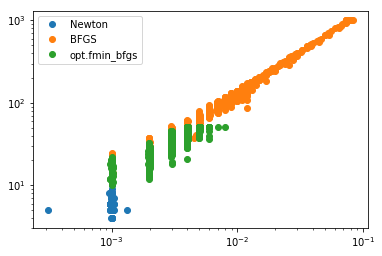

In [223]:
import time
def comparison(N):
    x0 = np.random.uniform(low = -3, high = 3, size=(N,2))
    speed1 = []
    iter1 = []
    speed2 = []
    iter2 = []
    speed3 = []
    iter3 = []
    for i in range(N):
        x = x0[i,:]
        start = time.time()
        iter1.append(Newton(df, d2f, x)[2])
        end = time.time() - start
        speed1.append(end)

        start = time.time()
        iter2.append(BFGS(df, x)[2])
        end = time.time() - start
        speed2.append(end)

        start = time.time()
        output = opt.fmin_bfgs(f=f, x0=x, fprime=df, maxiter=500, disp=False, retall = True)
        iter3.append(len(output[1]))
        end = time.time()  - start
        speed3.append(end)
        
    plt.loglog(speed1, iter1, 'o')
    plt.loglog(speed2, iter2, 'o')
    plt.loglog(speed3, iter3, 'o')
    plt.legend(['Newton', 'BFGS', 'opt.fmin_bfgs'])
    plt.show()

    
comparison(1000)

## Exercise 4: Gauss-Newton Method

In [137]:
from matplotlib import pyplot as plt


def gauss_newton(r, jac, x0, maxiter=100000, tol=1e-15):
    iter = 0
    epsi = 1 

    JJ = lambda x: jac(x).T @ jac(x)
    J = jac(x0)
    converged = False
    while (epsi > tol) & (iter < maxiter):
        iter += 1

        z = np.linalg.solve(JJ(x0), J.T @ r(x0))

        x = x0 - z
        epsi = np.linalg.norm(x-x0, 2)
        print("Error is", epsi)
        #Update
        x0 = x
        J = jac(x0)

        
    
    if  epsi< tol:
        print("Converged!")
        converged = True
        
    result = [x, iter, converged]
    return result


In [138]:
import numpy as np
from matplotlib import pyplot as plt
# Generate random data for t = 0, 1, ..., 10.
T = np.arange(10)
y = 3*np.sin(0.5*T)+ 0.5*np.random.randn(10) # Perturbed data.
# Define the model function and the residual (based on the data).
model = lambda x, t: x[0]*np.sin(x[1]*t) # phi(x,t)
residual = lambda x: model(x, T) - y # r(x) = phi(x,t) - y
# Define the Jacobian of the residual function, computed by hand.
jac = lambda x: np.column_stack((np.sin(x[1]*T, x[0]*T*np.cos(x[1]*T))))

In [139]:
x0 = np.array([2.5,.6])
jac = lambda x: np.column_stack((np.sin(x[1]*T), x[0]*T*np.cos(x[1]*T)))
gauss_newton(residual, jac, x0)

Error is 0.19547691188815758
Error is 0.4196304330885485
Error is 0.0005939638349948274
Error is 7.654137987334641e-05
Error is 2.2542696714923755e-06
Error is 8.349815863349683e-08
Error is 3.0632483162103156e-09
Error is 1.1241821554097212e-10
Error is 4.125421380131389e-12
Error is 1.5104583229974664e-13
Error is 5.236911533344271e-15
Error is 4.440892098500626e-16
Converged!


[array([2.74758897, 0.50471225]), 12, True]

In [140]:
opt.leastsq(func=residual, x0=np.array([2.5,.6]), Dfun=jac)

(array([2.74758889, 0.50471228]), 1)

## Exercise 5: Application of non-linear least square

In [145]:
from scipy.optimize import leastsq
import pandas as pd

data = np.load('population.npy')
data

array([[  0.   ,   3.929],
       [  1.   ,   5.308],
       [  2.   ,   7.24 ],
       [  3.   ,   9.638],
       [  4.   ,  12.866],
       [  5.   ,  17.069],
       [  6.   ,  23.192],
       [  7.   ,  31.443],
       [  8.   ,  38.558],
       [  9.   ,  50.156],
       [ 10.   ,  62.948],
       [ 11.   ,  75.996],
       [ 12.   ,  91.972],
       [ 13.   , 105.711],
       [ 14.   , 122.775],
       [ 15.   , 131.669]])

In [164]:
time = pd.date_range('1790', periods= 16, freq = '10Y' )

dataset = pd.DataFrame(data[:,1], index = time)
# dataset.plot()
# # plt.plot(time, data[:,1])
# # plt.show()

x0 = np.array([1.5, .4, 2.5])
model1 = lambda x, t: x[0]*np.exp(x[1]*(t + x[2]))
T = data[:,0]
y = data[:,1]
residual = lambda x: model1(x, T) - y

# Define the Jacobian of the residual function, computed by hand.
jac = lambda x: np.column_stack((np.exp(x[1]*(T + x[2])), \
                                 (T + x[2])*x[0]*np.exp(x[1]*(T + x[2])), \
                                x[1]*x[0]*np.exp(x[1]*(T + x[2]))))
                                
                                
X = leastsq(func=residual, x0=x0, Dfun=jac)[0]

print(X)



[1.67729595 0.18474177 9.11885064]


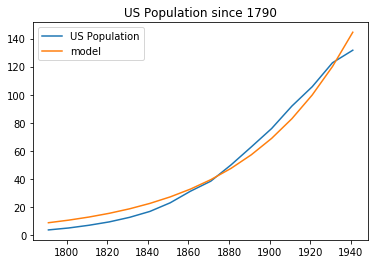

In [165]:
yhat = model1(X,T)
plt.plot(time, data[:,1])
plt.plot(time, yhat)
plt.legend(['US Population', 'model'])
plt.title('US Population since 1790')
plt.show()

In [171]:
#Different model

x0 = np.array([150, .4, -15])
model = lambda x, t: x[0]/(1 + np.exp(-x[1]*(t + x[2])))
T = data[:,0]
y = data[:,1]
residual = lambda x: model(x, T) - y

# Define the Jacobian of the residual function, computed by hand.
jac = lambda x: np.column_stack((1/(1 + np.exp(-x[1]*(T + x[2]))), \
                                 x[0]*(T + x[2])*(1 + np.exp(-x[1]*(T + x[2])))**(-2), \
                                 x[0]*x[1]*(1 + np.exp(-x[1]*(T + x[2])))**(-2)))
                                
                                
X = leastsq(func=residual, x0=x0, Dfun=jac)[0]
print(X)

[175.92019886   0.33629982 -11.72522672]


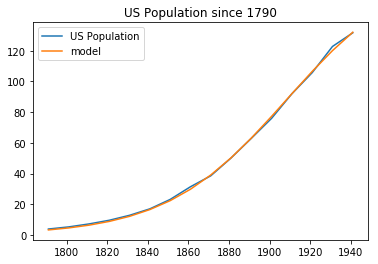

In [172]:
yhat = model(X,T)
plt.plot(time, data[:,1])
plt.plot(time, yhat)
plt.legend(['US Population', 'model'])
plt.title('US Population since 1790')
plt.show()